In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
lines2 = pd.read_csv("../data/The-Office-Lines-V4.csv")
scenes = lines2[['season', 'episode', 'title', 'scene', 'speaker']]


In [21]:
top_speakers = scenes.speaker.value_counts().head(10).index
top_speakers

Index(['Michael', 'Dwight', 'Jim', 'Pam', 'Andy', 'Kevin', 'Angela', 'Erin',
       'Oscar', 'Ryan'],
      dtype='object', name='speaker')

In [ ]:
"""mask = scenes['speaker'].isin(top_speakers)
filtered_scenes = scenes[mask].drop_duplicates()
print(filtered_scenes)
"""

       season  episode   title  scene   speaker
0           1        1   Pilot      1   Michael
1           1        1   Pilot      1       Jim
5           1        1   Pilot      2   Michael
6           1        1   Pilot      3   Michael
7           1        1   Pilot      3       Pam
...       ...      ...     ...    ...       ...
54620       9       24  Finale   8152    Darryl
54622       9       24  Finale   8154  Meredith
54623       9       24  Finale   8155   Phyllis
54624       9       24  Finale   8156       Jim
54625       9       24  Finale   8157       Pam

[16475 rows x 5 columns]


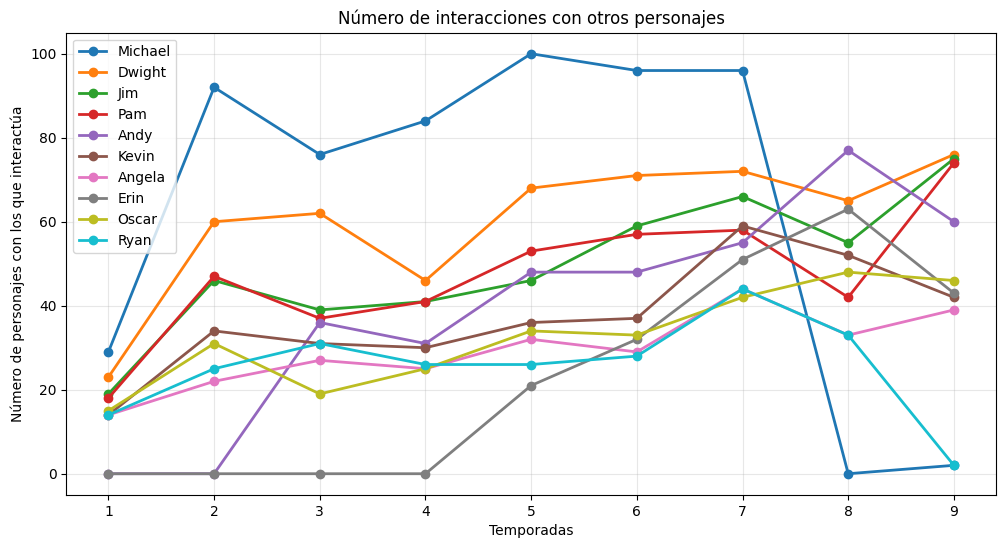

In [ ]:
# crear gráfico

# lista de personajes para mostrar en el gráfico
characters = top_speakers

# definir temporadas
seasons = sorted(scenes['season'].unique())

plt.figure(figsize=(12, 6))

# iterar la lista de personajes creando su línea de progreso
for character in characters:
    character_diversity = []
    
    for season in seasons:
        # escenas en las que el personaje aparece
        char_scenes = scenes[
            (scenes['season'] == season) & 
            (scenes['speaker'] == character)
        ]['scene'].unique()
        
        # personajes con los que comparte escena
        co_speakers = scenes[
            (scenes['season'] == season) & 
            (scenes['scene'].isin(char_scenes)) & 
            (scenes['speaker'] != character)
        ]['speaker'].unique()
        
        character_diversity.append(len(co_speakers))
    
    # linea del personaje
    plt.plot(seasons, character_diversity, marker='o', linewidth=2, markersize=6, label=character)

plt.xlabel('Temporadas')
plt.ylabel('Número de personajes con los que interactúa')
plt.title('Número de interacciones con otros personajes')
plt.grid(True, alpha=0.3)
plt.xticks(seasons)
plt.legend()
